# Práctica 2

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

Honi Github <a href = https://github.com/honi/uba-probabilidad-y-estadistica/blob/main/Soluciones/Pr%C3%A1ctica2.ipynb >Práctica 2</a>

Scipy.stats discretas <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions">documentation</a>

## Ejercicio 1

De un lote que contiene 15 artículos, de los cuales 4 son defectuosos, se eligen 3 artículos
al azar con reposicion. Si llamamos X al número de artículos defectuosos entre los
seleccionados

### Pregunta A

Hallar la función de probabilidad puntual asociada a X y graficarla usando R.

In [330]:
iteraciones = 10000
nItems = 15
nDef = 4
nSel = 3

res = [0,0,0,0]
for x in range(iteraciones):
    sDef = 0
    for y in range(nSel):
        sel = np.random.randint(1,nItems + 1)
        if sel <= 4:
            sDef += 1
    res[sDef] += 1

for x in range(len(res)):
    print("x_{} proba puntual {}".format(x, res[x]/iteraciones))

x_0 proba puntual 0.3984
x_1 proba puntual 0.4226
x_2 proba puntual 0.1608
x_3 proba puntual 0.0182


### Pregunta B

Hallar la función de distribución acumulada de X y graficarla usando R.

Text(0.5, 1.0, 'Distribución de probabilidad puntual')

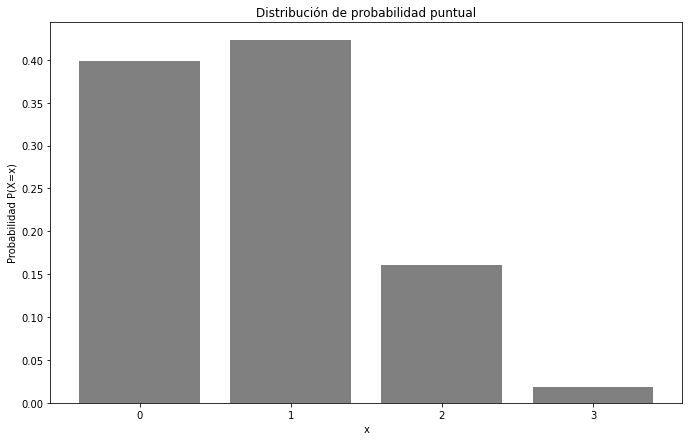

In [331]:
fig, ax = plt.subplots(figsize=(11.32,7))
[ax.bar(int(x), res[x]/iteraciones, color="grey") for x in range(len(res))]
plt.xticks(range(len(res)))
ax.set_xlabel("x")
ax.set_ylabel("Probabilidad P(X=x)")
ax.set_title("Distribución de probabilidad puntual")

Text(0.5, 1.0, 'Distribución de probabilidad acumulada')

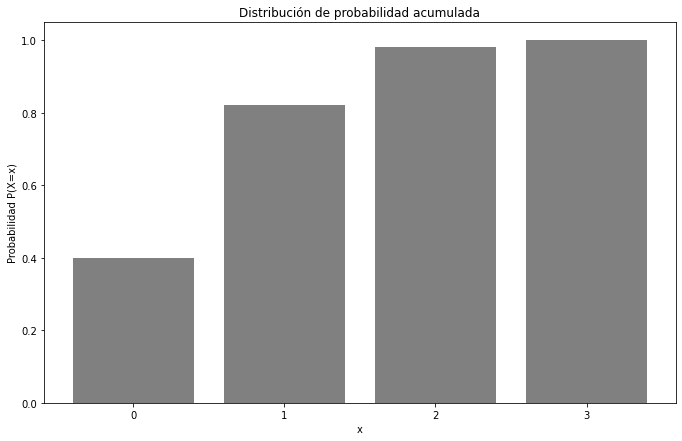

In [332]:
fig, ax = plt.subplots(figsize=(11.32,7))
ax.bar(0, sum(res[:1])/iteraciones, color="grey")
ax.bar(1, sum(res[:2])/iteraciones, color="grey")
ax.bar(2, sum(res[:3])/iteraciones, color="grey")
ax.bar(3, sum(res[:4])/iteraciones, color="grey")
plt.xticks(range(len(res)))
ax.set_xlabel("x")
ax.set_ylabel("Probabilidad P(X=x)")
ax.set_title("Distribución de probabilidad acumulada")

## Ejercicio 2

Sea X una variable aleatoria con función de distribución
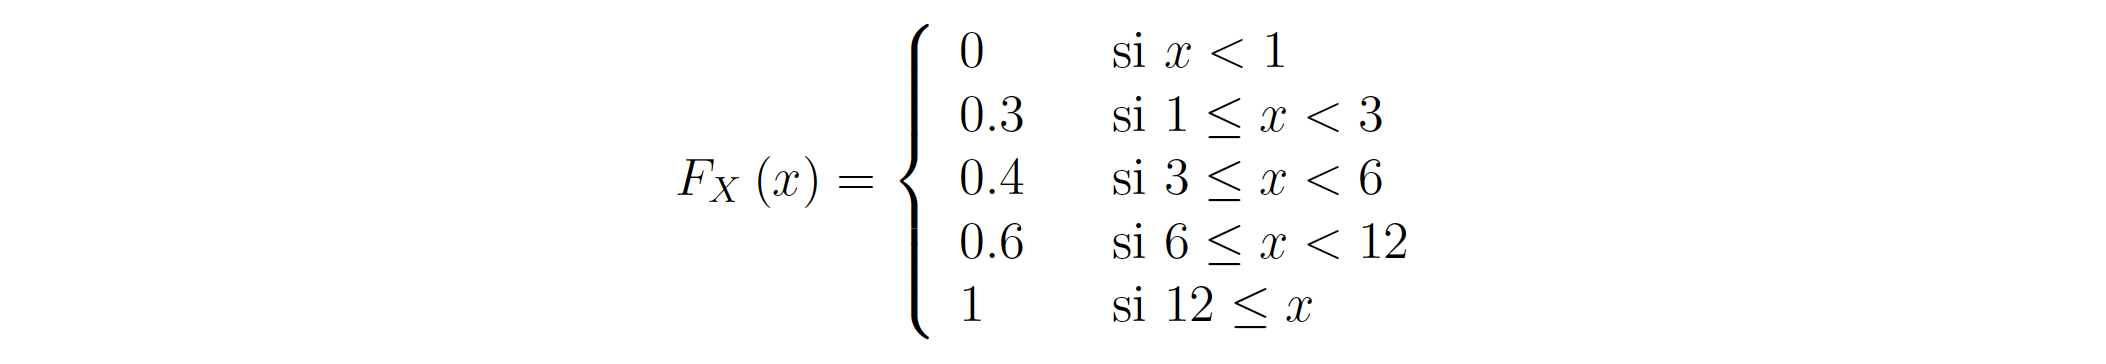

In [333]:
Fx0 = 0
Fx1 = 0.3
Fx3 = 0.4
Fx6 = 0.6
Fx12 = 1

<BarContainer object of 1 artists>

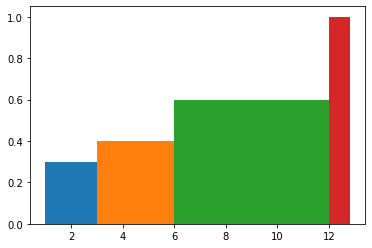

In [334]:
acum = [0, .3, .4, .6, 1]
plt.bar(1,Fx1,width=2,align="edge")
plt.bar(3,Fx3,width=3,align="edge")
plt.bar(6,Fx6,width=6,align="edge")
plt.bar(12,Fx12,align="edge")

### Pregunta A

Hallar la función de probabilidad puntual de X.

In [335]:
punt = [.3,.1,.2,.4]

###  Pregunta C

Utilizando el comando sample, generar 5 realizaciones de esta variable aleatoria
en R.

In [336]:
np.random.choice([1,3,6,12],5,True,punt)

array([ 6,  1,  6, 12,  6])

## Ejercicio 3

Definir una función en R que, dados dos vectores $x = (x1, ... , xn)$ y $p = (p1, ... , pn)$ y
un número real $t$, calcule $FX(t)$, es decir, la probabilidad de que de la variable aleatoria
discreta que toma valores $(x1,...,xn)$ con probabilidades $(p1,...,pn)$ respectivamente, sea
menor o igual que t. Probarla con la variable aleatoria del ejercicio 2.

In [337]:
def probAcum(x, p, t):
    acum = 0
    for i in range(len(x)):
        if x[i] <= t:
            acum += p[i]
        else:
            return acum
    return 1

#Pruba con datos del ej 2
ind = [1,3,6,12]
probas = [.3,.1,.2,.4]
ns = [0.5,1,5,8,10,12,15]
for x in ns:
    print("Fx({}) = {}".format(x, round(probAcum(ind,probas,x),5)))

Fx(0.5) = 0
Fx(1) = 0.3
Fx(5) = 0.4
Fx(8) = 0.6
Fx(10) = 0.6
Fx(12) = 1
Fx(15) = 1


## Ejercicio 4

Si $X$ es una v.a. discreta que toma sólo valores enteros, probar que para todo $k\in \mathbb{Z}$:

$
\begin{equation}
p_x(k) = F_x(k) - F_x(k-1)
\end{equation}$

## Ejercicio 5

Calcular la esperanza de la variable aleatoria definida en el ejercicio 1 utilizando la
definición y estimarla usando una simulación. Comparar los resultados.

$
\begin{align*}
E(X) &= \sum_{i \in R_X}{}{i \cdot p(X=i)}\\
\iff E(X) &= 0 \cdot \frac{1331}{3375} + 1 \cdot \frac{1452}{3375} + 2 \cdot \frac{528}{3375} + 3 \cdot \frac{64}{3375}\\
\iff E(x) &= \frac{1}{3375} \cdot (1452 + 1056 + 192)\\
\iff E(x) &= 0,8
\end{align*}$

In [338]:
espSimulada = sum((x*(res[x]/iteraciones) for x in range(len(res))))
espSimulada

0.7988

## Ejercicio 6

Definir una función en R que, dados dos vectores $x = (x_1,...,x_n)$ y $p = (p_1,...,p_n)$
calcule la esperanza de la variable aleatoria discreta que toma valores $(x_1,...,x_n)$ con
probabilidades $(p_1,...,p_n)$ respectivamente. Probar que funciona para la variable aleatoria
$X$ del ejercicio 1.

In [339]:
def esperanza(valores,probas):
    """
    Esperanza de una variable aleatoria discreta
    
    Parameters
    ----------
    valores: list
        Dominio de la variable aleatoria, conjunto de valores que puede tomar.
        
    probas: list
        Probabilidades asignadas a cada variable aleatoria.
    
    Return
    ---------
    Float: valor de la esperanza.
    """
    return sum([valores[i]*probas[i] for i in range(len(valores))])

In [340]:
#Prueba de cálculo vs función
aMano = 0.8
func = esperanza([0,1,2,3],[1331/3375,1452/3375,528/3375,64/3375])
aMano == func

False

## Ejercicio 7

Definir una función en R que, dados dos vectores $x = (x_1,...,x_n)$ y $p = (p_1,...p_n)$
calcule la varianza de la variable aleatoria discreta que toma valores $(x1,..,xn)$ con probabilidades
$(p1,...,pn)$ respectivamente. Probar que funciona para la variable aleatoria
$X$ del ejercicio 1.

In [341]:
def varianzaDisc(valores, probas):
    esp = esperanza(valores,probas)
    return sum([((valores[i]-esp)**2)*probas[i] for i in range(len(valores))])

In [342]:
varianzaDisc([0,1,2,3],[1331/3375,1452/3375,528/3375,64/3375])

0.5866666666666667

## Ejercicio 8

Hecho en OneNote

## Ejercicio 9

El 70% de las consultas de un sistema interactivo de computación requiere de acceso
a bases de datos. Un sistema recibe 25 consultas independientes unas de otras.

### Pregunta A

Cuál es la probabilidad de que:

**i. exactamente 20 consultas requieran acceso a una base de datos**

In [343]:
#Instanciar va binomial
va = scipy.stats.binom(25, 0.7)
print("Probabilidad de exactamente 20 consultas que requieran acceso a base de datos: {}".format(va.pmf(20)))

Probabilidad de exactamente 20 consultas que requieran acceso a base de datos: 0.1030165235339285


**ii. el número de consultas que requieran acceso a una base de datos esté entre 20 y 24 inclusive**

In [344]:
#Suma de probas puntuales
res = sum(va.pmf(x) for x in range(20,25))
print("Probabilidad de que entre 20 y 24 consultas requieran acceso a base de datos: {}".format(res))

Probabilidad de que entre 20 y 24 consultas requieran acceso a base de datos: 0.19335433522609854


In [345]:
#Usando probas acumuladas
F24 = va.cdf(24)
F19 = va.cdf(19)
res = F24-F19
print("Probabilidad de que entre 20 y 24 consultas requieran acceso a base de datos: {}".format(res))

Probabilidad de que entre 20 y 24 consultas requieran acceso a base de datos: 0.1933543352260988


### Pregunta B

Calcular el valor esperado y la varianza del numero de consultas que requieren
acceso a una base de datos.

In [346]:
esp = va.mean()
var = va.var()
print("Valor esperado (esperanza): {}".format(esp))
print("                  Varianza: {}".format(var))

Valor esperado (esperanza): 17.5
                  Varianza: 5.250000000000001


## Ejercicio 10

En OneNote

## Ejercicio 11

Para verificar si se cumplen las normas establecidas para arrojar residuos al río Reconquista,
un inspector visita al azar 10 de las 50 industrias establecidas a orillas de
dicho río.

### Pregunta A

Si en realidad 35 industrias no cumplen con alguna de las normas, ¿cuál es la
distribución del número de industrias visitadas que están en infracción? Calcular
la probabilidad de que 6 de las industrias visitadas estén en infracción.

In [347]:
h = scipy.stats.hypergeom(50,35,10)
res = h.pmf(6)
print("Proba de 6 industrias visitadas en infracción: {}".format(res))

Proba de 6 industrias visitadas en infracción: 0.21568860999799003


### Pregunta B

Si hay 500 industrias de las cuales 350 están en infracción, aproximar la distribución de (a) por una más simple. Calcular nuevamente la probabilidad de que 6 de las industrias visitadas estén en infracción.

$ X \sim H(N,D,n) \approx Bin(n, \frac{N}{D}) $

In [348]:
# Aproximación de Hipergeometrica por Binomial
b = scipy.stats.binom(10,350/500)
res = b.pmf(6)
print("Aproximación por binomial: {}".format(res))

Aproximación por binomial: 0.200120949


### Pregunta C

Sea $X$ el número de fábricas que están en infracción entre las 10 visitadas. Calcular
$E(X)$ y $V(X)$ para las distribuciones exacta (a) y aproximada (b).

In [349]:
print("Exactas:")
print("E(x) = {}".format(h.mean()))
print("Var(x) = {}".format(h.var()))
print("--------------------------------------")
print("Aproximadas:")
print("E(x) = {}".format(b.mean()))
print("Var(x) = {}".format(b.var()))

Exactas:
E(x) = 7.0
Var(x) = 1.7142857142857142
--------------------------------------
Aproximadas:
E(x) = 7.0
Var(x) = 2.1000000000000005


## Ejercicio 12

Una rueda de ruleta está dividida en 38 secciones, de las cuales 18 son rojas, 18 son
negras y las 2 restantes son verdes. Sea X el número necesario de juegos hasta obtener
una sección verde en jugadas independientes.

### Pregunta A

¿Cuál es la probabilidad de que sean necesarias al menos 4 jugadas?

In [350]:
#Usando probas puntuales
va = scipy.stats.geom(2/38)
res = 1 - sum(va.pmf(x) for x in range(1,4))
print("P(X >= 4) = {}".format(res))

P(X >= 4) = 0.8502697186178743


In [351]:
#Usando probas acumuladas
res = 1 - va.cdf(3)
print("P(X >= 4) = {}".format(res))

P(X >= 4) = 0.8502697186178744


### Pregunta B

Hallar la función de distribución acumulada de la v.a. $X$.

Text(0.5, 0, 'x')

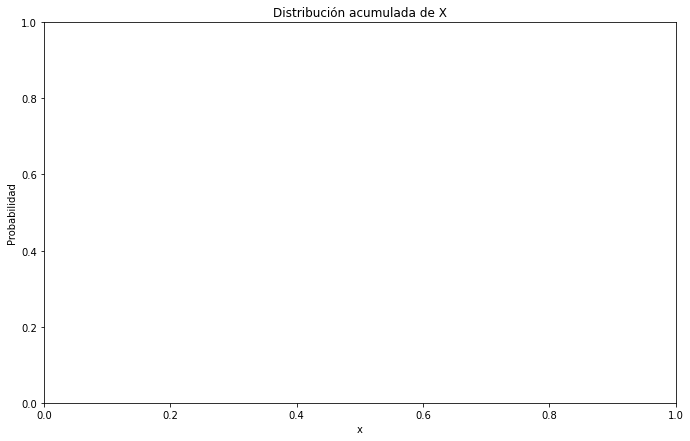

In [352]:
fig, ax = plt.subplots(figsize=(11.32,7))
x = 0
while value < 0.999999:
    value = va.cdf(x)
    ax.vlines(x,0, value)
    x += 1
ax.set_title("Distribución acumulada de X")
ax.set_ylabel("Probabilidad")
ax.set_xlabel("x")

### Pregunta C

Si fueron necesarias 7 o más jugadas, ¿cuál es la probabilidad de que se necesiten
al menos 10 jugadas? Comparar con (a).

Hay que usar la propiedad de la geométrica de *falta de memoria*

$ P(X \geq m+n \textrm{ | } X > n) = P(X\geq m)  $

Si se que un experimento se logra a partir de una jugada, es como que el experimento comienza de nuevo desde ahí.

In [353]:
#Usando la propiedad de falta de memoria
res = 1-va.cdf(3)
print("Proba de necesitar 10 jugadas sabiendo que fueron necesarias 7 o más = {}".format(res))

Proba de necesitar 10 jugadas sabiendo que fueron necesarias 7 o más = 0.8502697186178744


### Pregunta D

Hecho en OneNote

Hallar $E(X)$ y $V(X)$

In [354]:
print("E(x) = {}".format(va.mean()))
print("V(x) = {}".format(va.var()))

E(x) = 19.0
V(x) = 342.0000000000001


## Ejercicio 13

Si en el ejercicio anterior se define Y : número de juegos hasta obtener exactamente
tres secciones verdes

**Revisar nbinom de scipy tiene otra probabilidad**

### Pregunta A

Qué distribución tiene la v.a. $Y$

Tiene una distribución Binomial negativa, r = 3, p = $\frac{2}{38}$

$ Y \sim BN(3,\frac{2}{38}) $

In [355]:
va = scipy.stats.nbinom(3,2/38)

### Pregunta B

cuál es la probabilidad de que se requieran exactamente 5 jugadas?

In [356]:
va.pmf(5)

0.002336431283836397

## Ejercicio 14

Con el fin de encontrar una palabra clave, un motor de búsqueda de internet explora
una secuencia de sitios de la WEB en orden aleatorio. Al iniciar la búsqueda, el motor
elige, al azar y con igual probabilidad, una entre dos secuencias posibles de sitios. Se
sabe que el 10% de los sitios de la primera secuencia contienen esta palabra clave,
mientras que sólo el 5% de los sitios de la segunda contienen dicha palabra.

### Pregunta A

Si la búsqueda termina ni bien se encuentra un sitio que contenga la palabra clave.


Cuál es la probabilidad de que más de 5 sitios deban ser explorados?

In [357]:
vaS1 = scipy.stats.geom(0.1)
vaS2 = scipy.stats.geom(0.05)
res = (1-vaS1.cdf(5)) * 0.5 + (1-vaS2.cdf(5)) * 0.5
print("P(X>=6) = {}".format(res))

P(X>=6) = 0.68213546875


### Pregunta B

Si se sabe que el motor de búsqueda encontró la palabra clave en la sexta visita 

Cuál es la probabilidad de que la haya encontrado en la segunda secuencia?

In [358]:
#Usando Bayes
probX6_S2 = vaS2.pmf(6)
probS2 = 0.5
probX6 = (vaS1.pmf(6)) * 0.5 + vaS2.pmf(6) * 0.5
res = probX6_S2 * probS2 / probX6
print("P(S2|X=6) = {}".format(res))

P(S2|X=6) = 0.39584428083037637


### Pregunta C

Si la búsqueda termina cuando se encuentran 2 sitios que contenga la palabra clave

Cuál es la probabilidad de que deban explorarse exactamente 10 sitios?

**uso de binomial**

In [359]:
#Usando teo de la probabilidad total
nbn1 = scipy.stats.nbinom(2,0.1)
nbn2 = scipy.stats.nbinom(2,0.05)
res = nbn1.pmf(10) * 0.5 + nbn2.pmf(10) * 0.5
print("P(Y=10) = {}".format(res))

P(Y=10) = 0.0274099471200277


## Ejercicio 15

Un minorista ha verificado que la demanda semanal de cajones de cierto producto es una v.a. con distribución de Poisson de parámetro $\lambda = 2$. Completa su existencia los lunes por la mañana de manera de tener 4 cajones al principio de la semana. Al efectuar un análisis de la actividad de su negocio, se le plantean las siguientes preguntas

### Pregunta A

Cuál es la probabilidad de vender todo su stock durante la semana?

In [360]:
va = scipy.stats.poisson(2)
res = 1 - va.cdf(3)
print("P(X=4) = {}".format(res))

P(X=4) = 0.14287653950145296


### Pregunta B

Cuál es la probabilidad de que sea incapaz de cumplir con un pedido por lo menos?

In [361]:
print("P(x>=5) = {}".format(1-va.cdf(4)))

P(x>=5) = 0.052653017343711084


### Pregunta C

Cuál es la distribución del número de cajones vendidos en una semana?

Text(0.5, 1.0, 'Distribución de probabilidad de cajones vendidos en una semana')

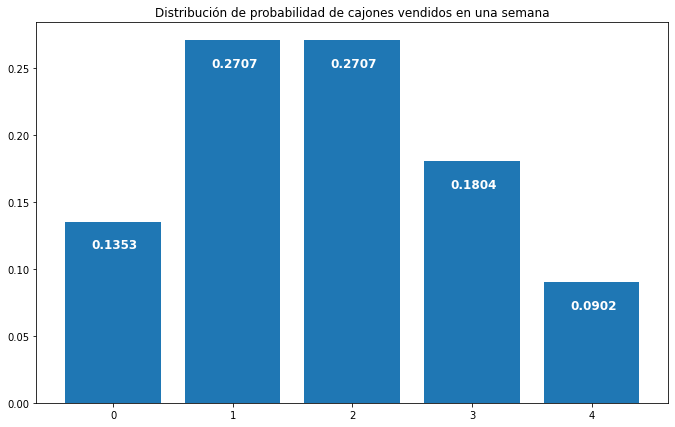

In [362]:
fig, ax = plt.subplots(figsize=(11.32,7))
for x in range(5):
    ax.bar(x, va.pmf(x),color="#1f77b4")
    ax.text(x-0.18, va.pmf(x) - 0.02, str(round(va.pmf(x),4)),color="White",fontsize=12,fontweight=900)
ax.set_title("Distribución de probabilidad de cajones vendidos en una semana")

### Pregunta D

Con cuántos cajones deberíaa iniciar la semana a fin de que la probabilidad de cumplir con todos sus pedidos fuese mayor o igual que 0.99?

In [363]:
x = 0
n = 0
while x < 0.999:
    print("Proba acumumulada a {} = {:.6f}".format(n, va.cdf(n)))
    x += va.pmf(n)
    n+=1

Proba acumumulada a 0 = 0.135335
Proba acumumulada a 1 = 0.406006
Proba acumumulada a 2 = 0.676676
Proba acumumulada a 3 = 0.857123
Proba acumumulada a 4 = 0.947347
Proba acumumulada a 5 = 0.983436
Proba acumumulada a 6 = 0.995466
Proba acumumulada a 7 = 0.998903
Proba acumumulada a 8 = 0.999763


## Ejercicio 16

Un bibliotecario ubica 1000 libros en un cierto día. Si la probabilidad de que un libro
cualquiera sea mal ubicado es 0.001 y los libros se ubican en forma independiente

¿cuál es la distribución aproximada del número de libros mal ubicados en ese día?

In [364]:
# Es una distribución de Poisson, parece una binomial, pero con n muy grande y p pequeño. lambda = n.p
va = scipy.stats.poisson(1000*.001)

Utilizando esta distribución, calcular la probabilidad de que

### Pregunta A

Por lo menos un libro sea mal ubicado ese día.

In [365]:
res = 1 - va.cdf(0)
print("P(X>=1) = {}".format(res))

P(X>=1) = 0.6321205588285576


### Pregunta B

Exactamente 3 libros sean mal ubicados ese día. Comparar con el valor exacto.

In [366]:
res = va.pmf(3)
print("Poisson(3) = {}".format(res)) 

Poisson(3) = 0.06131324019524039


In [367]:
# El valor exacto se calcula por medio de la Bin(1000,0.001)
vab = scipy.stats.binom(1000,0.001)
res = vab.pmf(3)
print("Binom(3) = {}".format(res)) 

Binom(3) = 0.061282509389840666


## Ejercicio 17

En un concurso de pesca cada pescador paga 100\\$ por participar. La cantidad de peces obtenida por cada pescador durante el desarrollo del concurso es una v.a. con distribución de Poisson de parámetro $\lambda = 4$. Hay un premio de 50$ por pieza. Cada pescador tiene permitido cobrar a lo sumo 6 piezas (es decir, aunque pesque más de 6 cobrará sólo por 6).

### Pregunta A

Calcular la función de probabilidad puntual de la ganancia neta de un pescador.

Text(0.5, 1.0, 'Distribución puntual de pesca')

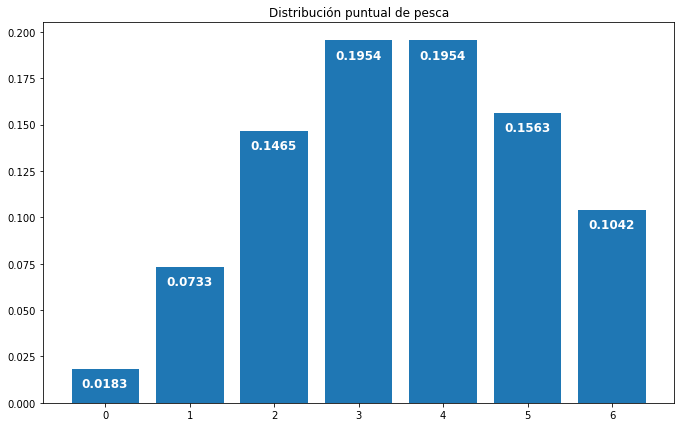

In [368]:
va = scipy.stats.poisson(4)
fig, ax = plt.subplots(figsize=(11.32,7))
for x in range(7):
    ax.bar(x, va.pmf(x),color="#1f77b4")
    ax.text(x-0.28, va.pmf(x) - 0.01, str(round(va.pmf(x),4)),color="White",fontsize=12,fontweight=900)
ax.set_title("Distribución puntual de pesca")

In [369]:
# Pero al asignar a la ganancia, hay que tener en cuenta que a partir de 6 se gana lo mismo
P6 = 1 - va.cdf(5)
print("P(X>=6) = {}".format(P6))

P(X>=6) = 0.21486961296959484


In [370]:
# Luego la distribución de ganancia quedaría
dist = {}
print("Distribución de probabilidad de ganancia")
print("----------------------------------------")
for x in range(6):
    p = va.pmf(x)
    v = -100+50*x
    print("{} = {}".format(v,p))
    dist[v] = p
print("200 = {}".format(P6))
dist[200] = P6

Distribución de probabilidad de ganancia
----------------------------------------
-100 = 0.01831563888873418
-50 = 0.07326255555493673
0 = 0.14652511110987343
50 = 0.19536681481316454
100 = 0.19536681481316454
150 = 0.1562934518505317
200 = 0.21486961296959484


### Pregunta B

Cuánto dinero espera ganar cada participante?

In [371]:
res = sum(k * dist[k] for k in dist.keys())
print("E[ganancia] = {}".format(res))

E[ganancia] = 90.22827092685316


## Ejercicio 18

Sea X una variable aleatoria binomial con $n = 5$ y $p = \frac{1}{3}$.

### Pregunta A

Graficar la función de probabilidad puntual pX y la función de distribución acumulada FX

Text(0.5, 1.0, 'Probabilidad puntual')

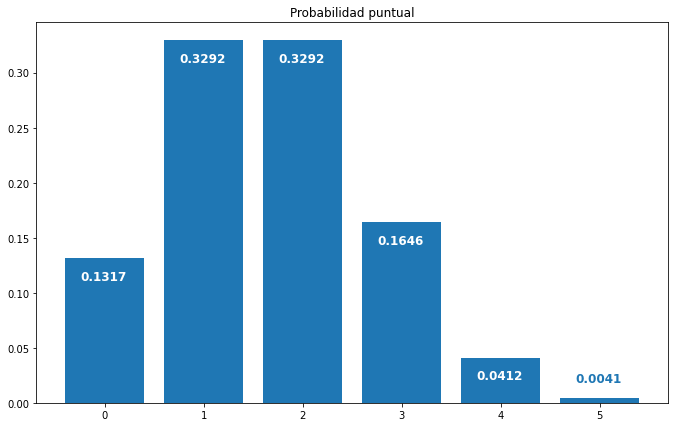

In [372]:
va = scipy.stats.binom(5,1/3)
fig, ax = plt.subplots(figsize=(11.32,7))
for x in range(5):
    value = va.pmf(x)
    ax.bar(x, value,color="#1f77b4")
    ax.text(x-0.25, value - 0.02, str(round(value,4)),color="White",fontsize=12,fontweight=900)

ax.bar(5, va.pmf(5),color="#1f77b4")
ax.text(5-0.25, va.pmf(5) + 0.015, str(round(va.pmf(5),4)),color="#1f77b4",fontsize=12,fontweight=900)
ax.set_title("Probabilidad puntual")

Text(0.5, 1.0, 'Dsitribución probabilidad acumulada')

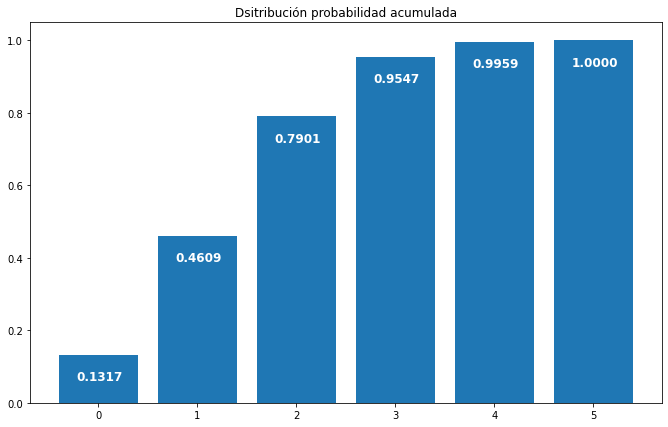

In [373]:
va = scipy.stats.binom(5,1/3)
fig, ax = plt.subplots(figsize=(11.32,7))
for x in range(6):
    value = va.cdf(x)
    ax.bar(x, value,color="#1f77b4")
    ax.text(x-0.22, value - 0.07, "{:.4f}".format(value),color="White",fontsize=12,fontweight=900)
    x += 1
ax.set_title("Dsitribución probabilidad acumulada")

### Pregunta B

Graficar la función de distribución acumulada de $X$ utilizando la función implementada en el ejercicio 3. Comparar con el gráfico obtenido en (a).

Text(0.5, 1.0, 'Dsitribución probabilidad acumulada usando funcion del ej 3')

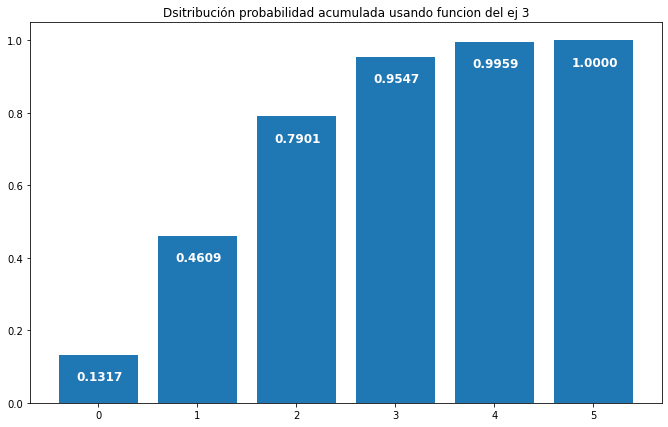

In [374]:
fig, ax = plt.subplots(figsize=(11.32,7))
for x in range(6):
    value = probAcum(range(6), [va.pmf(x) for x in range(6)],x)
    ax.bar(x, value,color="#1f77b4")
    ax.text(x-0.22, value - 0.07, "{:.4f}".format(value),color="White",fontsize=12,fontweight=900)
    x += 1
ax.set_title("Dsitribución probabilidad acumulada usando funcion del ej 3")

In [375]:
# Prueba de igualdad
for x in range(6):
    print("{} vs.\n{}".format(probAcum(range(6), [va.pmf(y) for y in range(6)],x), va.cdf(x)))

0.13168724279835398 vs.
0.13168724279835395
0.46090534979423886 vs.
0.4609053497942387
0.7901234567901237 vs.
0.7901234567901234
0.954732510288066 vs.
0.9547325102880658
0.9958847736625517 vs.
0.9958847736625515
1 vs.
1.0


### Pregunta C

Utilizando el comando rbinom generar 1000 realizaciones de la variable aleatoria X y calcular la proporción de veces que X toma los valores 0, 1, 2, 3, 4 y 5. Comparar con los valores que toma la fpp.

In [376]:
niter = 1000
counts = [0,0,0,0,0,0]
for x in va.rvs(niter):
    counts[x] += 1

for x in range(len(counts)):
    print("P({}) = {} | fpp ({}) = {:.5f}".format(x, counts[x]/niter, x, va.pmf(x)))

P(0) = 0.141 | fpp (0) = 0.13169
P(1) = 0.317 | fpp (1) = 0.32922
P(2) = 0.323 | fpp (2) = 0.32922
P(3) = 0.168 | fpp (3) = 0.16461
P(4) = 0.044 | fpp (4) = 0.04115
P(5) = 0.007 | fpp (5) = 0.00412


## Ejercicio 19

Las tareas llegan a una cola de un sistema de computación con un solo servidor de acuerdo con un proceso de Poisson de parámetro $\lambda = 5$ tareas por minuto. Llamemos a dicho proceso $X_t$

### Pregunta A

Cuál es la probabilidad de que en 30 segundos lleguen menos de 5 tareas?

In [377]:
#Proceso de Poisson
va = scipy.stats.poisson(5/2)
res = va.cdf(4)
print("P(X<5) = {}".format(res))

P(X<5) = 0.8911780189141513


### Pregunta B

Sea $X_1$ la cantidad de tareas recibidas en un minuto. Calcular:

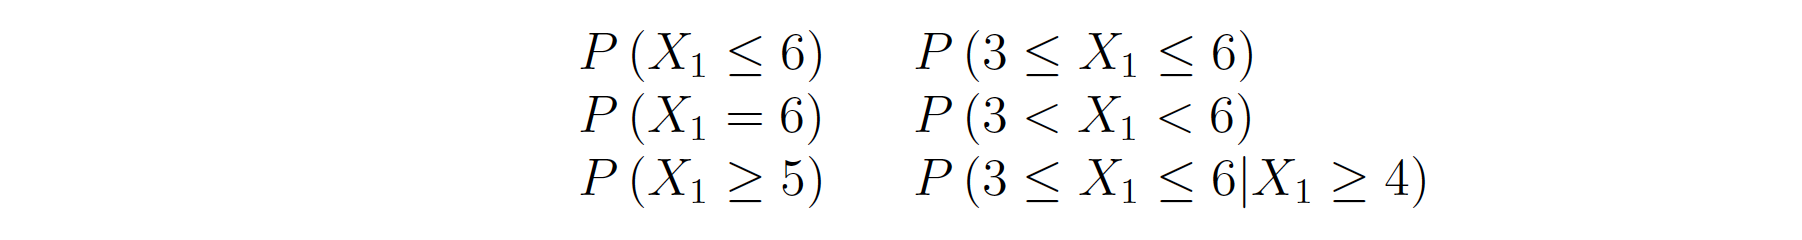

In [378]:
va = scipy.stats.poisson(5)
print("P(X<=6) = {}".format(va.cdf(6)))
print("P(X=6) = {}".format(va.pmf(6)))
print("P(X>=5) = {}".format(1-va.cdf(4)))
print("P(3<=X<=6) = {}".format(sum(va.pmf(x) for x in range(3,7))))
print("P(3<X<6) = {}".format(sum(va.pmf(x) for x in [4,5])))

P(X<=6) = 0.7621834629729387
P(X=6) = 0.1462228081398754
P(X>=5) = 0.5595067149347874
P(3<=X<=6) = 0.6375314434898572
P(3<X<6) = 0.3509347395357013


### Pregunta C

Cuál es el número esperado de tareas que se reciben en media hora?

In [379]:
va = scipy.stats.poisson(30*5)
res = va.mean()
print("E[X] = {}".format(res))

E[X] = 150.0


## Ejercicio 20

El número de veces que una red de computadoras se bloquea sigue un proceso de Poisson de parámetro igual a 2 bloqueos por semana. Hallar la probabilidad de que

### Pregunta A

En 2 semanas no se bloquee

In [380]:
va = scipy.stats.poisson(2*2)
res = va.pmf(0)
print("P(X=0) = {}".format(res))

P(X=0) = 0.01831563888873418


### Pregunta B

En un periodo de 4 semanas, haya exactamente 1 semana en la que no se bloquea. (Sugerencia: Notar que se está preguntando por cantidad de semanas, no de bloqueos.)

In [381]:
#Binomial Bin(4,Poi(4sem)
poi = scipy.stats.poisson(2)
probaNoBloqueos = poi.pmf(0)
bnm = scipy.stats.binom(4,res)
res = bnm.pmf(1)
print("P(X=1) = {}".format(res))

P(X=1) = 0.06931028442764768


# Clase 7/9

Ejercicio de parcial viejo.

**TODO buscar enunciado y completar resolución**

In [21]:
lamda = 12
n = 5
rv = scipy.stats.poisson(lamda)
rv.pmf(n)

0.012740638735861376

In [22]:
lamda = 10
n = 5
rv = scipy.stats.poisson(lamda)
rv.pmf(n)

0.03783327480207079

In [23]:
lamda = 4
n = 5
rv = scipy.stats.poisson(lamda)
rv.pmf(n)

0.1562934518505317